In [ ]:
#### Importing the essential libraries ######

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the data set #####

In [17]:
Employee_Data = pd.read_csv('C:\\Users\\SAHANA\\Documents\\Data Analysis Projects\\WA_Fn-UseC_-HR-Employee-Attrition.csv')  

In [5]:
data = Employee_Data.head()   ## Checking the head of the data ##
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
Employee_Data.isna().sum()  ## checking for missing values in the data set

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Data Analysis 

In [ ]:
### Plotting a pie chart to understand the employee churn rate ###

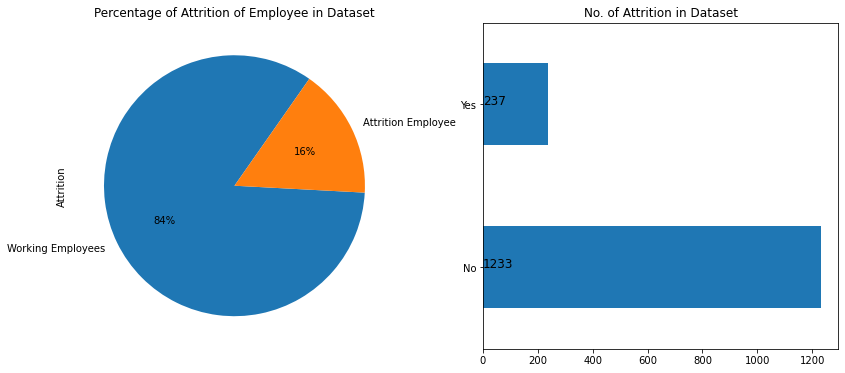

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = Employee_Data['Attrition'].value_counts().plot.pie( x="Attrition" ,y ='no.of employees', 
                   autopct = "%1.0f%%",labels=["Working Employees","Attrition Employee"], startangle = 55,ax=ax1);
ax1.set(title = 'Percentage of Attrition of Employee in Dataset')

ax2 = Employee_Data["Attrition"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(Employee_Data["Attrition"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Attrition in Dataset')
plt.show()


In [ ]:
#### Dropping the unnessecary features, which do not bring any impact on the analysis ####

In [18]:
Employee_Data = Employee_Data.drop(['EmployeeCount','EmployeeNumber','StandardHours', 'Over18'], axis = 1)

In [ ]:
#### Attrition is our target variable, it has two values, Yes/ No. We replace these two values with 1 and 0 respectively. ####

In [19]:
Employee_Data.Attrition.replace(['Yes','No'],[1,0],inplace=True)
Employee_Data.OverTime.replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
#### understanding the object type features and numeric features ####

In [23]:
object_features = Employee_Data.select_dtypes(include= ['object'])
numerical_features = Employee_Data.select_dtypes(exclude= ['object'])

In [24]:
object_features

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [25]:
numerical_features

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
### Exploring the relation between target variable 'Attrition' and other categorical variables ###

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

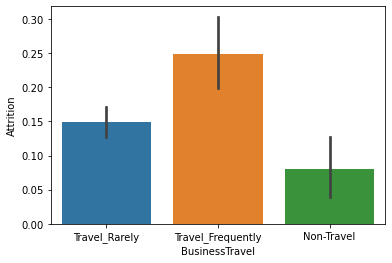

In [26]:
sns.barplot(x = Employee_Data['BusinessTravel'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Business Travel

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

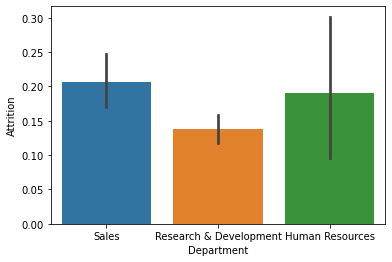

In [27]:
sns.barplot(x = Employee_Data['Department'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Department

<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

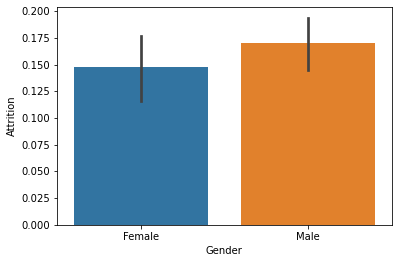

In [28]:
sns.barplot(x = Employee_Data['Gender'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Gender

<AxesSubplot:xlabel='EducationField', ylabel='Attrition'>

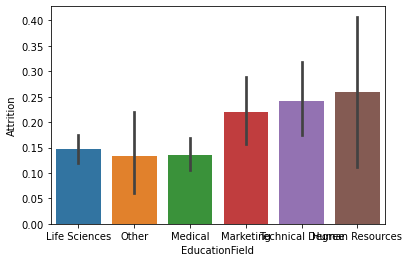

In [29]:
sns.barplot(x = Employee_Data['EducationField'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Education Field

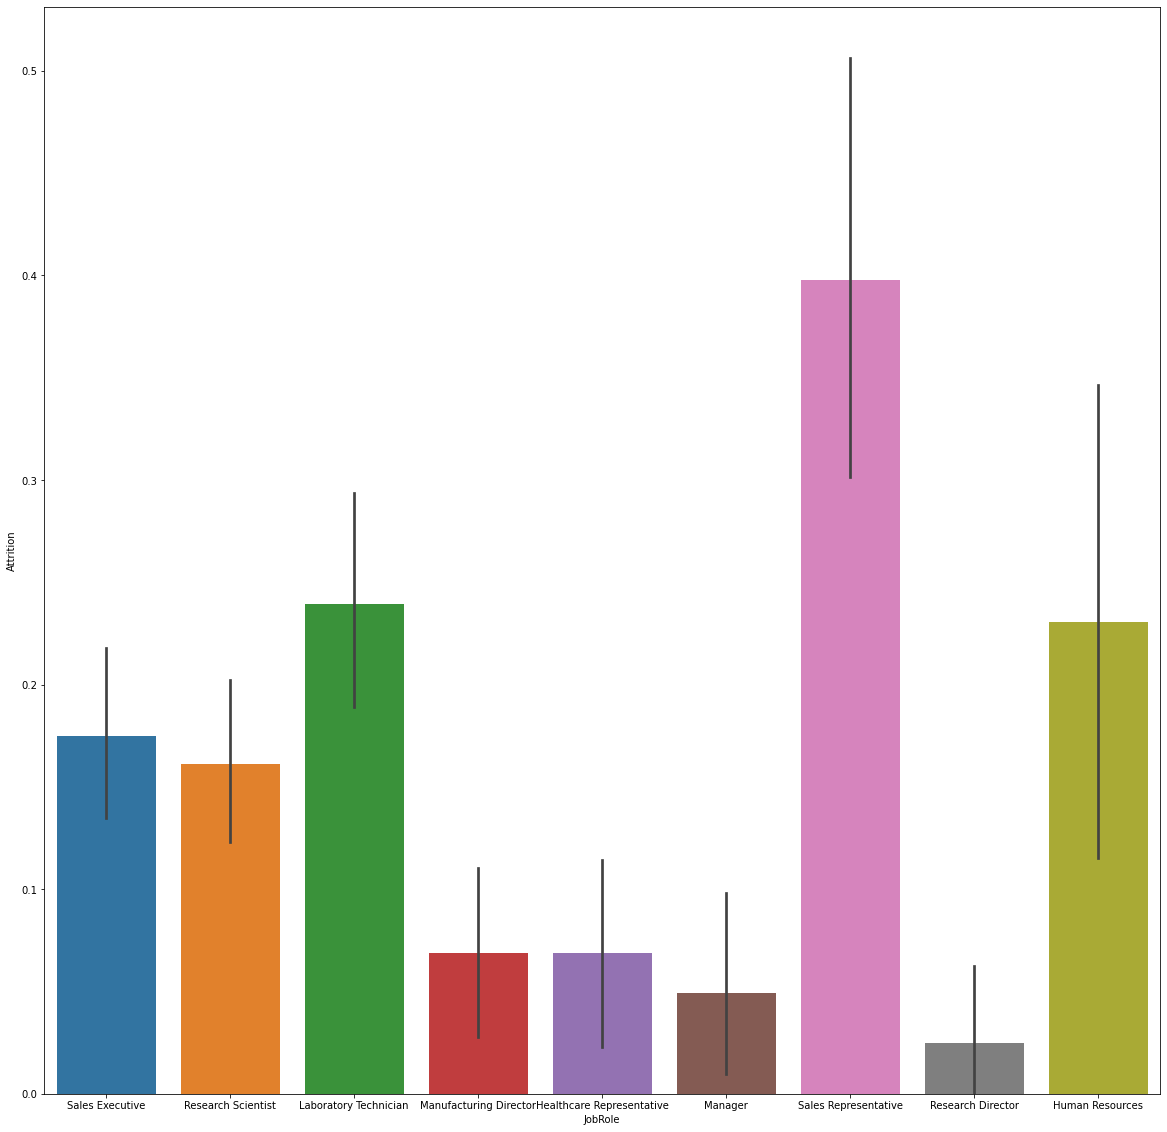

In [34]:
plt.figure(figsize = (20,20))
sns.barplot(x = Employee_Data['JobRole'],y = Employee_Data['Attrition']  )
## Understanding relation between Attrition and Job Role
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

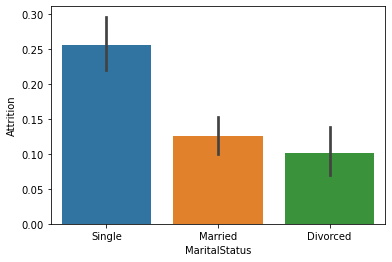

In [35]:
sns.barplot(x = Employee_Data['MaritalStatus'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Marital Status

In [ ]:
### Understanding relation between target variable 'Attrition' and numeric features ###

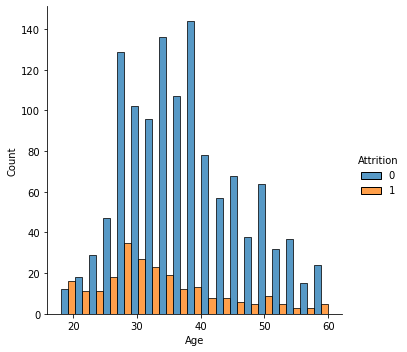

In [40]:
sns.displot(Employee_Data, x="Age", hue = 'Attrition', multiple = 'dodge')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

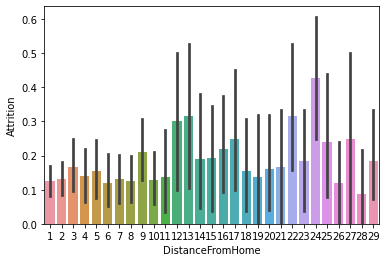

In [56]:
sns.barplot(x = Employee_Data['DistanceFromHome'],y = Employee_Data['Attrition']  )   ## Understanding relation between Attrition and Marital Status

<AxesSubplot:xlabel='Education', ylabel='Attrition'>

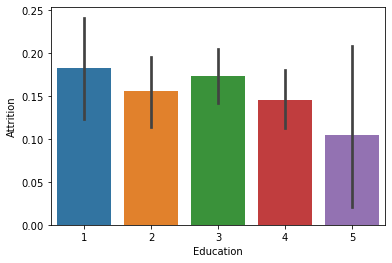

In [48]:
sns.barplot(x = Employee_Data['Education'],y = Employee_Data['Attrition']  ) 

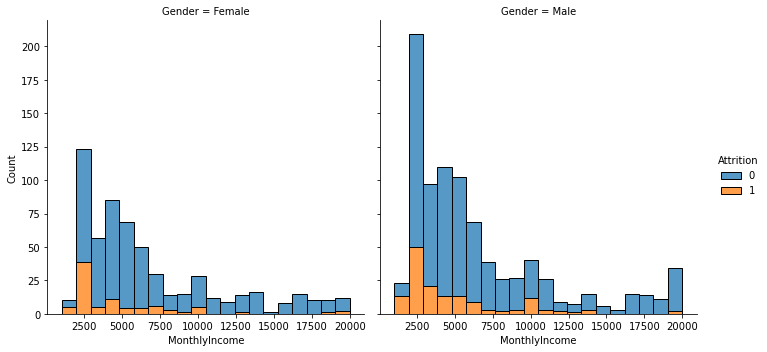

In [63]:
sns.displot(Employee_Data, x="MonthlyIncome", hue = 'Attrition', multiple = 'stack', col = 'Gender' )

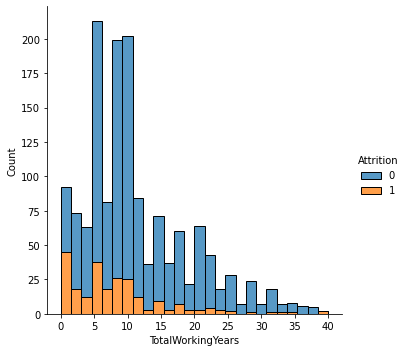

In [65]:
sns.displot(Employee_Data, x="TotalWorkingYears", hue = 'Attrition', multiple = 'stack' )

# Data Pre-processing 

In [ ]:
##### One hot encoding for categorical variables #######

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
employee_df_department = pd.get_dummies(Employee_Data['Department'],prefix = 'Department')

In [68]:
employee_df_department

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,0,1


In [22]:
employee_df_BusinessTravel = pd.get_dummies(Employee_Data['BusinessTravel'],prefix = 'BusinessTravel')
employee_df_BusinessTravel

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
1465,0,1,0
1466,0,0,1
1467,0,0,1
1468,0,1,0


In [23]:
employee_df_Gender = pd.get_dummies(Employee_Data['Gender'],prefix = 'Gender', drop_first = True)
employee_df_Gender

,Gender_Male
0,0
1,1
2,1
3,0
4,1
...,...
1465,1
1466,1
1467,1
1468,1


In [24]:
employee_df_EducationField = pd.get_dummies(Employee_Data['EducationField'],prefix = 'EducationField')

In [72]:
employee_df_EducationField

,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1465,0,0,0,1,0,0
1466,0,0,0,1,0,0
1467,0,1,0,0,0,0
1468,0,0,0,1,0,0


In [25]:
employee_df_JobRole = pd.get_dummies(Employee_Data['JobRole'],prefix = 'JobRole')
employee_df_JobRole

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1465,0,0,1,0,0,0,0,0,0
1466,1,0,0,0,0,0,0,0,0
1467,0,0,0,0,1,0,0,0,0
1468,0,0,0,0,0,0,0,1,0


In [26]:
employee_df_MaritalStatus = pd.get_dummies(Employee_Data['MaritalStatus'],prefix = 'MaritalStatus')
employee_df_MaritalStatus

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,1,0


In [27]:
employee_df_OverTime= pd.get_dummies(Employee_Data['OverTime'],prefix = 'OverTime', drop_first = True)
employee_df_OverTime

,OverTime_1
0,1
1,0
2,1
3,1
4,0
...,...
1465,0
1466,0
1467,1
1468,0


In [ ]:
### dropping the columns which have been encoded, to avoid redundant data ###

In [28]:
Employee_Data = Employee_Data.drop(['Department', 'BusinessTravel','EducationField','Gender','JobRole','MaritalStatus','OverTime'], axis = 1)

In [ ]:
### Now, concatenating the dataset, with the newly created encoded columns ###

In [29]:
Employee_Data = pd.concat([Employee_Data,employee_df_department,employee_df_BusinessTravel,employee_df_Gender,employee_df_EducationField,employee_df_JobRole,employee_df_MaritalStatus,employee_df_OverTime],axis = 1)

In [80]:
data = Employee_Data.head()
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_1
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,1,0,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
##### separating the target variable #####

In [30]:
y_df = Employee_Data['Attrition']
x_df = Employee_Data.drop(['Attrition'], axis = 1)

In [83]:
y_df

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Analysis using Machine learning Algorithms

In [ ]:
#### Train-test split, 70% of the data set used for training, remaining 30% used for testing.

In [31]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x_df,y_df,test_size=0.33,random_state=1)

In [88]:
#### 1st Model: Logistic Regression

In [ ]:
#### Logistic Regression using 70-30 split, L2 penalty ####

In [50]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(multi_class='auto', penalty='l2', solver = 'liblinear' )
logit_model = Classifier.fit(Xtrain,ytrain)
y_pred_logit= logit_model.predict(Xtest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model.score(Xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.86


In [ ]:
#### printing the confusion matrix ####

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred_logit)
print(cm)
accuracy_score(ytest,y_pred_logit)

[[393   8]
 [ 58  27]]


0.8641975308641975

In [ ]:
### printing the performance report ###

In [96]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_logit))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       401
           1       0.77      0.32      0.45        85

    accuracy                           0.86       486
   macro avg       0.82      0.65      0.69       486
weighted avg       0.85      0.86      0.84       486



In [ ]:
#### plotting the ROC ####

In [63]:
import sklearn.metrics as metrics
probs = logit_model.predict_proba(Xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

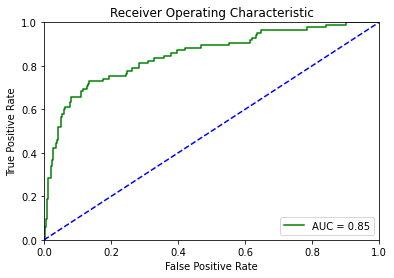

In [104]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [107]:
##### Logistic Regression using K fold cross validation and L1 penalty #######

In [51]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, shuffle=True, random_state=1)
model_with_crossvalidation = LogisticRegression(multi_class='auto', penalty='l1', solver = 'liblinear' )
scores = cross_val_score(model_with_crossvalidation, x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.875 (0.033)


In [ ]:
##### Model 2: Ensemble Methods: Random Forests

In [32]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(max_depth = 5,random_state = 0, criterion = 'gini')
Random_model = Classifier.fit(Xtrain,ytrain)
y_pred_RF= Random_model.predict(Xtest)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(Random_model.score(Xtest, ytest)))

Accuracy of Random Forest classifier on test set: 0.84


In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_RF))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       401
           1       1.00      0.08      0.15        85

    accuracy                           0.84       486
   macro avg       0.92      0.54      0.53       486
weighted avg       0.87      0.84      0.78       486



In [ ]:
## ROC Curve using Random Forest Classifier ###

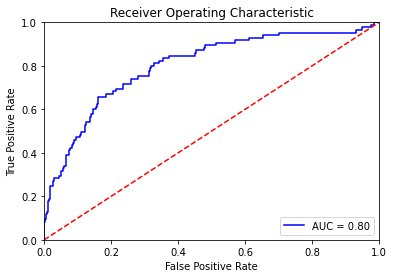

In [37]:
probs = Random_model.predict_proba(Xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#### Feature Importance using XGBoost Classifier

In [129]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt

[22:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 3600x3600 with 0 Axes>

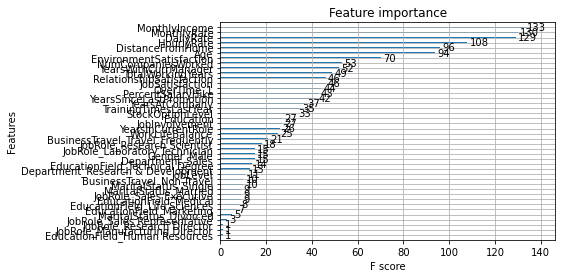

In [134]:
model_XG = XGBClassifier()
model_XGBoost = model_XG.fit(Xtrain,ytrain)
plt.figure(figsize=(50,50))
plot_importance(model_XGBoost)

plt.show()


In [ ]:
#### Key take aways: Monthly Income, Monthly Rate, Hourly Rate, Distance from home, Age, and Environment Satisfaction are the top 6 features, impacting the Attrition.

In [ ]:
#### Recursive Feature Elimination ####

In [ ]:
##RFE using Decision Trees Estimator, and K fold cross validation

In [140]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier  ##RFE using estimator = Decision Tree Classifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = KFold(n_splits=10, random_state=1)
n_scores = cross_val_score(pipeline,x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# evaluate model

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.788 (0.024)


In [ ]:
## Recusrive Feature Elimination using Random Forest Classifier, keeping all 50 features, and K fold cross validation

In [141]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = KFold(n_splits=10, random_state=1)
n_scores = cross_val_score(pipeline,x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# evaluate model

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.860 (0.022)


In [ ]:
### Visualising important features, using Recursive Feature Elimination, Random Forest Classifier and Cross Validation ###

In [53]:
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=KFold(10), scoring='accuracy')
rfecv.fit(Xtrain, ytrain)
print('Optimal number of features: {}'.format(rfecv.n_features_))


Optimal number of features: 49


In [ ]:
### visualizing % of correct classification with increasing number of features ###

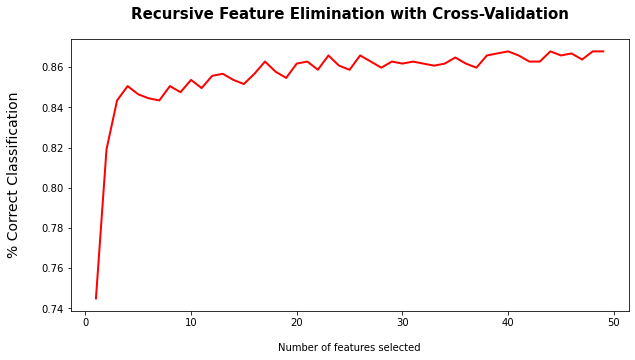

In [56]:
plt.figure(figsize=(10, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=10, labelpad=15)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='red', linewidth=2)

plt.show()


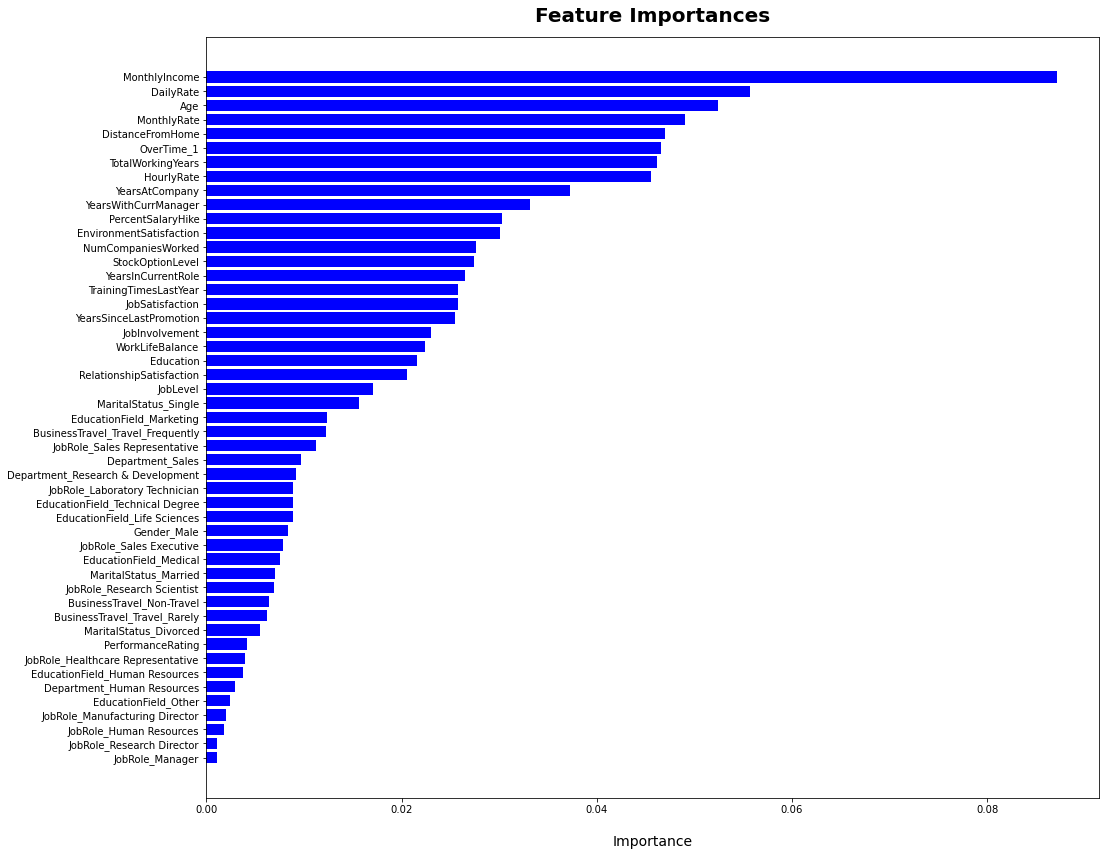

In [62]:
dset = pd.DataFrame()
dset['attr'] = Xtrain.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='blue')
plt.title('Feature Importances', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
#### Key Take-Aways:

# Logistic Regression using 70-30 split of train-test data, and L2 penalty, yielded 86.4% accuracy.
# Logistic Regression using K fold cross validation and L1 penalty, yielded 87.5% accuracy.
# Ensemble Method: Random Forest Classifier, with 70-30 split of train-test data yielded 84% accuracy.
# Random Forest Classifier, with Recursive Feature Elimination, and Cross Validation yielded 86% accuracy.
# Feature Importances are visualised in descending order, starting with the top most impactful feature, from the set of 50 features using Recursive Feature Elimination and Random Forest Classifier